In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import requests
url = "https://www.bankofcanada.ca/rates/exchange/daily-exchange-rates-lookup/?lookupPage=lookup_daily_exchange_rates_2017.php&startRange=2017-01-01&series%5B%5D=FXINRCAD&lookupPage=lookup_daily_exchange_rates_2017.php&startRange=2017-01-01&rangeType=range&rangeValue=&dFrom=2023-09-12&dTo=2023-11-12&submit_button=Submit"
response = requests.get(url, verify=False)
html_content = response.content
# Getting table data from html link
list_of_df = pd.read_html(html_content,header=0)

c:\Users\skrmr\miniconda3\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bankofcanada.ca'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [13]:
# Getting 1st index table/data frame from website
conversionDF = list_of_df[1]
conversionDF.head()

,Date,INR → CAD,CAD → INR
0,2023-09-12,0.01636,61.1247
1,2023-09-13,0.01634,61.1995
2,2023-09-14,0.01627,61.4628
3,2023-09-15,0.01627,61.4628
4,2023-09-18,0.01620,61.7284


In [14]:
# calculating mean value of CAD->INR conversion rate and rounding decimal value to 4 digits
meanValue = round(conversionDF["CAD → INR"].replace("Bank holiday",0).astype(float).mean(), 4) 
meanValue

56.864

In [15]:
conversionDF["CAD → INR"].replace("Bank holiday", str(meanValue), inplace=True)  # replacing Bank holiday for CAD->INR value to mean value

In [146]:
conversionDF  # conversion DF from Canada website with last 60 days conversion rate

,Date,INR → CAD,CAD → INR
0,2023-09-12,0.01636,61.1247
1,2023-09-13,0.01634,61.1995
2,2023-09-14,0.01627,61.4628
3,2023-09-15,0.01627,61.4628
4,2023-09-18,0.01620,61.7284
5,2023-09-19,0.01612,62.0347
6,2023-09-20,0.01618,61.8047
7,2023-09-21,0.01622,61.6523
8,2023-09-22,0.01623,61.6143
9,2023-09-25,0.01620,61.7284


In [16]:
x = conversionDF.iloc[:,0]                # getting all rows, 0 index column which is Date from coversionDF
y = conversionDF.iloc[:,2].astype(float)  # getting CAD->INR column as y axis, it is string converting to float so that it gets arranged on y-axis properly

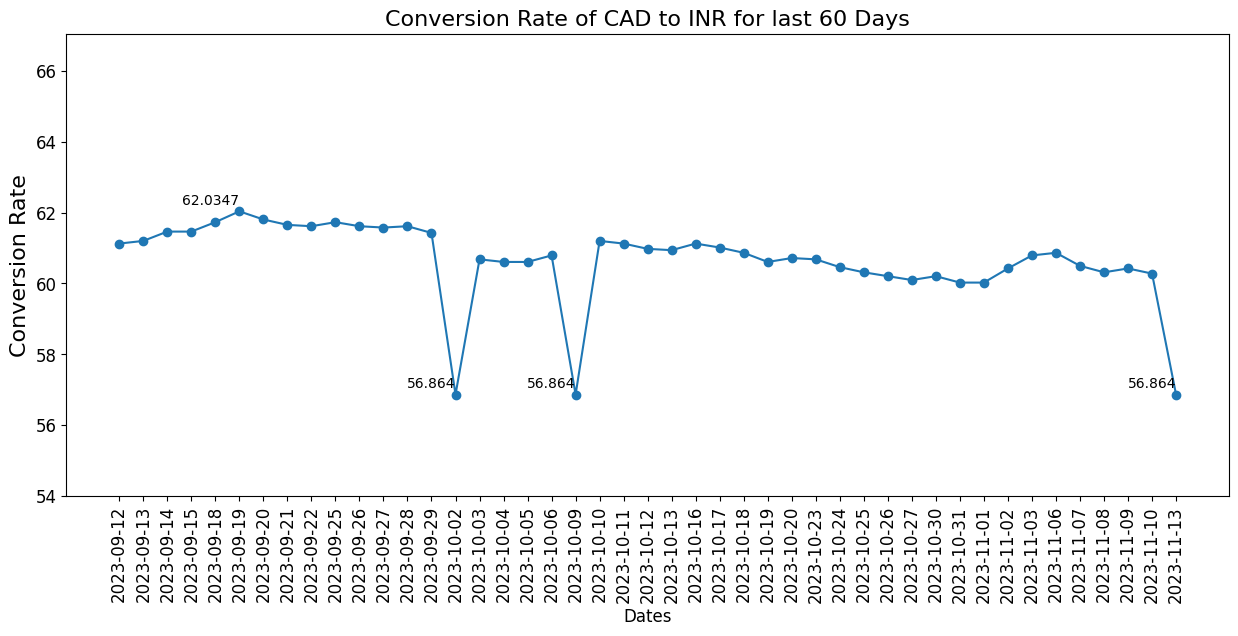

In [53]:
plt.figure(figsize=(15,6)) # overall line chart size
plt.plot(x,y, '-o')  # plotting x and y axis
plt.title('Conversion Rate of CAD to INR for last 60 Days', fontsize=16) # font size of line chart label
plt.xlabel('Dates', fontsize=12)  # fint size of x-axis labe;
plt.ylabel('Conversion Rate',fontsize=16) # font size of y-axis labe;
plt.xticks(fontsize=12, rotation=90) # font size of date and rotation value
plt.yticks(fontsize=12)      # Font size of coversion rates
plt.ylim(54, max(y) + 5)

# zip joins x and y coordinates in pairs
max_index = np.argmax(y)
min_index = np.argmin(y)
for a, b in zip(x,y):
    label = b
    #print(b,'-',y[max_index])
    if (b==y[max_index] or b==y[min_index]):
        plt.annotate(label, # this is the text
                 (a,b), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='right') # horizontal alignment can be left, right or center

plt.show()

In [54]:
# Calculate mean and standard deviation
mean_rate = y.mean()
std_dev = y.std()

In [55]:
# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = std_dev * np.percentile(np.abs(np.random.normal(size=10000)), (1 - confidence_level) * 100)

# Calculate the expected range
lower_bound = mean_rate - margin_of_error
upper_bound = mean_rate + margin_of_error

expected_range = (lower_bound, upper_bound)

# Print the results
print("Predicted Range of Currency: {:.2f} to {:.2f} INR".format(expected_range[0], expected_range[1]))

Predicted Range of Currency: 60.58 to 60.73 INR
